assignment 1<br> Ashkar 8901587

Given the symptoms exhibited in a patient and a database of anonymized patient records, predict whether the patient is likely to have an illness (Parkinson’s disease).
    A model of this decision problem could be used by a program to provide decision support to medical professionals.
  	
   You can follow the following steps :
  	
   •	Data Analysis
  	
   •	Data Preprocessing
  	
   •	Data Standardization
  	
   •	Model Training
  	
   •	Measure your model’s accuracy.
  	
      a.	Use 80% of samples as training data size.

   •	Build a predictive system to verify that the model built is able to predict the patient’s Parkinson’s disease with one instance of the dataset.
  	

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


1. Data Analysis

In [154]:
# Load the dataset
data = pd.read_csv("pd_speech_features.csv",skiprows=1)
data

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,251,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,251,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


In [155]:
print("the dataset shape ",data.shape)


# Find class feature distribution
print(data['class'].value_counts())

the dataset shape  (756, 755)
class
1    564
0    192
Name: count, dtype: int64


2. Data Preprocessing

In [156]:
# Check null values
data.isnull().values.any()
# Remove duplicate values
print(f'before remove null values : {data.shape}')
data.shape
data.drop_duplicates(inplace=True)
data.shape
print(f' after removing null values: {data.shape}')

before remove null values : (756, 755)
 after removing null values: (755, 755)


In [157]:
# Remove duplicate rows
data.drop_duplicates(inplace=True)

# Reset the index after removing duplicates
data.reset_index(drop=True, inplace=True)
data
data= data.groupby('id').mean().reset_index()
data

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1.0,0.823387,0.696370,0.567250,235.333333,234.333333,0.008220,0.000073,0.001963,...,1.561733,2.862000,12.293333,9.717500,9.055300,6.259100,4.021533,4.164333,22.961700,1.0
1,1,0.0,0.415637,0.793993,0.592453,213.333333,211.000000,0.008884,0.001849,0.005790,...,4.918567,4.827133,6.117633,8.599667,5.737233,7.933133,5.490533,4.941833,4.467233,1.0
2,2,1.0,0.801973,0.619967,0.520563,319.333333,318.333333,0.006041,0.000104,0.002217,...,41.129400,31.201933,14.584467,5.446800,3.462000,4.772067,9.176633,11.848100,5.552367,1.0
3,3,0.0,0.828707,0.626097,0.537183,493.000000,492.000000,0.003913,0.000042,0.000757,...,1.677633,1.908400,2.842167,3.493867,3.282433,3.085267,3.184433,4.032933,22.773633,1.0
4,4,0.0,0.831287,0.779397,0.726717,362.666667,361.666667,0.005622,0.002023,0.003593,...,4.104600,4.285233,2.953200,2.799933,2.645100,2.811367,7.268333,13.338833,63.766900,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,247,0.0,0.751703,0.651830,0.586847,326.000000,324.666667,0.005911,0.000251,0.003193,...,19.298667,15.072200,13.479700,14.877933,22.053767,20.532267,17.000400,16.132633,40.472133,1.0
248,248,1.0,0.611750,0.688327,0.452343,356.666667,355.333333,0.005410,0.000964,0.002467,...,4.448533,3.180933,2.880233,2.805067,2.872667,3.071367,3.957200,4.962500,2.890800,1.0
249,249,1.0,0.819857,0.788800,0.373520,339.666667,338.666667,0.005684,0.000042,0.000800,...,90.482767,65.641367,29.098533,8.966500,6.558600,11.885633,16.674300,14.303767,11.819967,1.0
250,250,0.0,0.600530,0.569010,0.411987,402.333333,401.000000,0.004775,0.000103,0.000983,...,2.674667,2.714200,2.706000,2.637700,3.816233,3.421233,4.149200,5.726533,13.467700,0.0


In [158]:
data.columns

Index(['id', 'gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses',
       'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter',
       ...
       'tqwt_kurtosisValue_dec_28', 'tqwt_kurtosisValue_dec_29',
       'tqwt_kurtosisValue_dec_30', 'tqwt_kurtosisValue_dec_31',
       'tqwt_kurtosisValue_dec_32', 'tqwt_kurtosisValue_dec_33',
       'tqwt_kurtosisValue_dec_34', 'tqwt_kurtosisValue_dec_35',
       'tqwt_kurtosisValue_dec_36', 'class'],
      dtype='object', length=755)

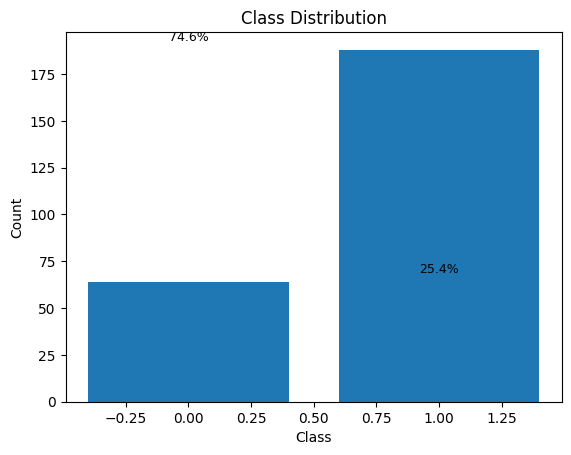

In [159]:
# Calculate the value counts of each class in the 'class' column
x = data['class'].value_counts()

# Create a bar chart to visualize the distribution of classes
plt.bar(x.index, x.values)

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')

# Calculate the percentage for each class
total_count = len(data)
percentage_values = [(count / total_count) * 100 for count in x.values]

# Display the percentage values on top of each bar
for i, value in enumerate(percentage_values):
    plt.text(i, x.values[i] + 5, f'{value:.1f}%', ha='center', fontsize=9)

# Show the chart
plt.show()


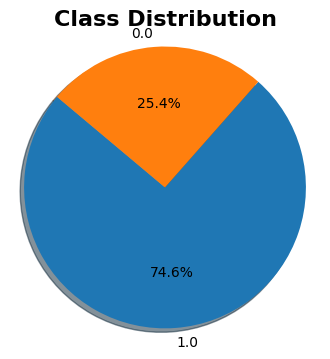

In [172]:

# Calculate the value counts of each class in the 'class' column
x = data['class'].value_counts()

# Define custom colors for the pie chart
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Create a pie chart to visualize the distribution of classes
plt.figure(figsize=(4, 4))  # Set the figure size
plt.pie(x.values, labels=x.index, colors=custom_colors, autopct='%1.1f%%', shadow=True, startangle=140)

# Customize additional parameters for a better appearance
plt.title('Class Distribution', fontsize=16, fontweight='bold')  # Add a title with custom font size and weight
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart appears as a circle

# Show the chart
plt.show()


**3. DATA Standardization**

In [160]:
X = data.drop('class', axis=1)
y = data['class']
 
X_train, X_test,y_train, y_test = train_test_split(X, y,
                                      test_size=0.2,
                                      random_state=10)
X_train.shape, X_test.shape

((201, 754), (51, 754))

In [161]:
X = data.drop(columns=['class'])
y = data['class']
# Standardize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

4.MODEL TRAINING 

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

5. •	Measure your model’s accuracy.
  	
      a.	Use 80% of samples as training data size.


In [163]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8235294117647058


In [164]:
from sklearn import metrics
print(metrics.classification_report
      (y_test, model.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.78      0.50      0.61        14
         1.0       0.83      0.95      0.89        37

    accuracy                           0.82        51
   macro avg       0.81      0.72      0.75        51
weighted avg       0.82      0.82      0.81        51



6. Build a predictive system to verify that the model built is able to predict the patient’s Parkinson’s disease with one instance of the dataset.

In [169]:
import numpy as np
# Get the first instance from the NumPy array X
instance = X[0]

# Reshape the instance to have the correct format for prediction (assuming it's a single sample)
instance = instance.reshape(1, -1)

# Scale the instance using the same scaler used during training
instance_scaled = scaler.transform(instance)

# Make the prediction using the model
prediction = model.predict(instance_scaled)

print(f"Predicted Class: {prediction[0]}")


Predicted Class: 1.0


c:\Users\ashka\Desktop\New_folder\New_folder\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [170]:
if prediction[0] == 1:
    print("The patient is likely to have Parkinson's disease.")
else:
    print("The patient is not likely to have Parkinson's disease.")

The patient is likely to have Parkinson's disease.


*In conclusion, the model showed an overall accuracy of 82% on the test set. While it demonstrated excellent precision, recall, and F1-scores for class 1 (83%, 95%, and 89% respectively), it faced difficulties predicting class 0, resulting in lower precision (78%), recall (50%), and F1-score (61%). Despite this discrepancy, the model's weighted average F1-score of 81% suggests that its overall performance is reasonably good. However, the varying performance between the two classes underscores the importance of addressing class imbalances and considering specific strategies for improving predictions on the more challenging class 0.*